### Base de dados do Titanic

Problema gerador: Titanic - mulheres e crianças primeiro? Jack e Rose exisrtiram?

<p>Importando Bibliotecas</p>

In [2]:
import pandas as pd
import numpy as np

<p>Leitura da base de dados</p>

In [3]:
titanic = pd.read_csv('./dataset/titanic.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Analisando informações do dataset

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dados Nulos

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
(titanic.isnull().sum()/titanic.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

As colunas "Age","Cabin", "Embarked" contêm valores nulos. Vamos tratar esses dados para eliminar os valores nulos. Além disso, a coluna "Age" está sendo tratada como um valor decimal (float), mas o ideal é que seja um valor inteiro.

In [7]:
#Preenchendo os valores nulos da coluna Age com a média
mean_age = titanic['Age'].mean()

titanic['Age'] = titanic['Age'].fillna(mean_age)

#Transformando a coluna Age para inteiro
titanic['Age'] = titanic['Age'].astype(int)

Para eliminar os valores nulos na coluna "Age", foi aplicada a média das idades nas linhas correspondentes e os valores resultantes foram convertidos para inteiros.

A coluna "Cabin" será excluída, pois possui muitos valores nulos, cerca de 78% deles.

In [8]:
titanic = titanic.drop(columns=['Cabin'])

Na coluna "Embarked", iremos substituir os valores nulos pelo local com a maior quantidade de embarques.

In [9]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

Na coluna "Ticket", é possível observar que algumas linhas contêm letras, o que está incorreto, pois os tickets devem conter apenas números. Vamos remover essas letras.

In [11]:
titanic['Ticket'] = titanic['Ticket'].str.replace('[^0-9]', '', regex=True)

Na coluna "Fare", vamos ajustar os valores dos tickets para exibir apenas duas casas decimais após a vírgula.



In [12]:
titanic['Fare'] = titanic['Fare'].map('{:.2f}'.format).astype(float)

In [13]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,521171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,23101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C


### Dados Categóricos

In [14]:
titanic.select_dtypes(exclude=[np.number])

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,521171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,17599,C
2,"Heikkinen, Miss. Laina",female,23101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [15]:
titanic.select_dtypes(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7.25
1,2,1,1,38,1,0,71.28
2,3,1,3,26,0,0,7.92
3,4,1,1,35,1,0,53.10
4,5,0,3,35,0,0,8.05
...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13.00
887,888,1,1,19,0,0,30.00
888,889,0,3,29,1,2,23.45
889,890,1,1,26,0,0,30.00


Vamos analisar um poucos mais!

Perfil demográfico do titanic (em termos de classes)

- Quantas pessoas tem na base de dados?

In [16]:
titanic.shape[0]

891

- Quais as classes sociais?

In [17]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
(titanic['Pclass'].value_counts(normalize=True))*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

- Qual a distribuição de sexo?

In [19]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
(titanic['Sex'].value_counts(normalize=True))*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

- Qual a distribuição de váriaveis númericas?

In [21]:
titanic['Fare'].describe()

count    891.000000
mean      32.204175
std       49.693606
min        0.000000
25%        7.910000
50%       14.450000
75%       31.000000
max      512.330000
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

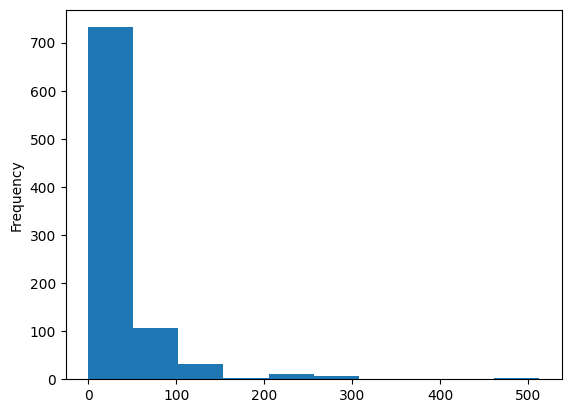

In [22]:
titanic['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

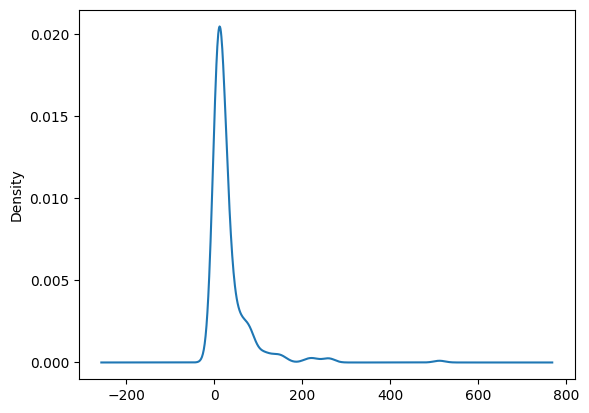

In [23]:
titanic['Fare'].plot(kind='kde')

- Qual a taxa de sobrevivência do titanic?

In [24]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
(titanic['Survived'].value_counts(normalize=True))*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

- Qual a proporção de homens/mulheres que morreram/sobreviveram? 

In [26]:
titanic[titanic['Sex'] == 'male']['Survived'].value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

In [27]:
titanic[titanic['Sex'] == 'male']['Survived'].mean()

0.18890814558058924

In [28]:
titanic[titanic['Sex'] == 'female']['Survived'].value_counts()

Survived
1    233
0     81
Name: count, dtype: int64

In [29]:
titanic[titanic['Sex'] == 'female']['Survived'].mean()

0.7420382165605095

- Idem anterior em relação as classes sociais?

In [30]:
titanic.query("Sex == 'male' and Pclass == 1")["Survived"].mean()

0.36885245901639346

In [31]:
titanic.query("Sex == 'male' and Pclass == 2")["Survived"].mean()

0.1574074074074074

In [32]:
titanic.query("Sex == 'male' and Pclass == 3")["Survived"].mean()

0.13544668587896252

In [33]:
titanic.query("Sex == 'female' and Pclass == 1")["Survived"].mean()

0.9680851063829787

In [34]:
titanic.query("Sex == 'female' and Pclass == 2")["Survived"].mean()

0.9210526315789473

In [35]:
titanic.query("Sex == 'female' and Pclass == 3")["Survived"].mean()

0.5

### Agrupamento

- Relação de sobreviventes entre as classes sociais

In [36]:
titanic.groupby(['Pclass','Sex'])[['Survived']].mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

- Relação do valor da passagem entre as classes sociais

In [37]:
titanic.groupby(['Pclass','Sex'])[['Fare']].agg(['mean','min','max','std'])

Fare                          
                     mean    min     max        std
Pclass Sex                                         
1      female  106.125957  25.93  512.33  74.260717
       male     67.226066   0.00  512.33  77.548054
2      female   21.970132  10.50   65.00  10.891826
       male     19.741852   0.00   73.50  14.922075
3      female   16.118264   6.75   69.55  11.690530
       male     12.661729   0.00   69.55  11.681946

- Relação entre o ponto de embarque, a taxa de sobrevida e a classe 

In [38]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [39]:
titanic.groupby(['Pclass','Embarked'])[['Survived']].agg(['mean','count'])

Survived      
                     mean count
Pclass Embarked                
1      C         0.694118    85
       Q         0.500000     2
       S         0.589147   129
2      C         0.529412    17
       Q         0.666667     3
       S         0.463415   164
3      C         0.378788    66
       Q         0.375000    72
       S         0.189802   353

### Respondendo o problema gerador

- Quantas mulheres e crianças sobreviveram?

In [40]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- Qual a proporção de sobreviventes e mortos?

In [41]:
titanic["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

- Qual a quantidade de pessoas de casa sexo que morreu/sobreviveu?

In [42]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [43]:
titanic.groupby(["Sex", "Embarked", "Pclass"])[["Survived"]].mean()

Survived
Sex    Embarked Pclass          
female C        1       0.976744
                2       1.000000
                3       0.652174
       Q        1       1.000000
                2       1.000000
                3       0.727273
       S        1       0.960000
                2       0.910448
                3       0.375000
male   C        1       0.404762
                2       0.200000
                3       0.232558
       Q        1       0.000000
                2       0.000000
                3       0.076923
       S        1       0.354430
                2       0.154639
                3       0.128302

In [44]:
titanic.groupby(["Sex", "Embarked", "Pclass"])[["Survived"]].agg(["mean", "count"])

Survived      
                            mean count
Sex    Embarked Pclass                
female C        1       0.976744    43
                2       1.000000     7
                3       0.652174    23
       Q        1       1.000000     1
                2       1.000000     2
                3       0.727273    33
       S        1       0.960000    50
                2       0.910448    67
                3       0.375000    88
male   C        1       0.404762    42
                2       0.200000    10
                3       0.232558    43
       Q        1       0.000000     1
                2       0.000000     1
                3       0.076923    39
       S        1       0.354430    79
                2       0.154639    97
                3       0.128302   265

In [45]:
titanic.groupby(["Sex", "Embarked", "Pclass","Survived"])[["Survived"]].agg([ "count"])

Survived
                                   count
Sex    Embarked Pclass Survived         
female C        1      0               1
                       1              42
                2      1               7
                3      0               8
                       1              15
       Q        1      1               1
                2      1               2
                3      0               9
                       1              24
       S        1      0               2
                       1              48
                2      0               6
                       1              61
                3      0              55
                       1              33
male   C        1      0              25
                       1              17
                2      0               8
                       1               2
                3      0              33
                       1              10
       Q        1      0               1
                2      0               1
                3      0              36
                       1               3
       S        1      0              51
                       1              28
                2      0              82
                       1              15
                3      0             231
                       1              34

### Adicionando a coluna de classificação de idade

In [46]:
titanic['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [47]:
def faixa_etaria(idade):
    if idade <= 15:
        return '0-15'
    elif idade <= 30:
        return '15-30'
    elif idade <= 45:
        return '30-45'
    else:
        return '45+'

In [48]:
titanic['Age'].apply(faixa_etaria)

0      15-30
1      30-45
2      15-30
3      30-45
4      30-45
       ...  
886    15-30
887    15-30
888    15-30
889    15-30
890    30-45
Name: Age, Length: 891, dtype: object

In [49]:
titanic['Age Class'] = titanic['Age'].apply(faixa_etaria)

- Quantos passageiros há em cada faixa etária?

In [50]:
titanic['Age Class'].value_counts() 

Age Class
15-30    505
30-45    202
45+      101
0-15      83
Name: count, dtype: int64

- Qual a distribuição de sexo dentro de cada faixa etária?

In [51]:
titanic.groupby(['Age Class', 'Sex'])[['Sex']].count()

Sex
Age Class Sex        
0-15      female   43
          male     40
15-30     female  169
          male    336
30-45     female   72
          male    130
45+       female   30
          male     71

- Qual a proporção de mortes/sobreviventes dentro de cada faixa etária?

In [52]:
titanic.groupby(['Age Class'])[['Survived']].agg(['mean','count'])

Survived      
               mean count
Age Class                
0-15       0.590361    83
15-30      0.334653   505
30-45      0.425743   202
45+        0.376238   101

- Qual a distribuição de sexo dentro de cada faixa etária?

In [53]:
titanic.groupby(['Age Class','Sex'])[['Survived']].agg(['mean','count'])

Survived      
                      mean count
Age Class Sex                   
0-15      female  0.651163    43
          male    0.525000    40
15-30     female  0.721893   169
          male    0.139881   336
30-45     female  0.791667    72
          male    0.223077   130
45+       female  0.866667    30
          male    0.169014    71

- Qual a distribuição de sexo dentro de cada faixa etária e classe social?

In [54]:
titanic.groupby(['Age Class','Sex','Pclass'])[['Survived']].agg(['mean','count'])

Survived      
                             mean count
Age Class Sex    Pclass                
0-15      female 1       0.666667     3
                 2       1.000000    10
                 3       0.533333    30
          male   1       1.000000     3
                 2       1.000000     9
                 3       0.321429    28
15-30     female 1       0.975610    41
                 2       0.916667    36
                 3       0.532609    92
          male   1       0.340909    44
                 2       0.057692    52
                 3       0.120833   240
30-45     female 1       1.000000    30
                 2       0.913043    23
                 3       0.315789    19
          male   1       0.470588    34
                 2       0.129032    31
                 3       0.138462    65
45+       female 1       0.950000    20
                 2       0.857143     7
                 3       0.333333     3
          male   1       0.268293    41
                 2       0.062500    16
                 3       0.000000    14

### Extraindo sobrenomes da coluna name

In [55]:
#String genérica

nome = "Sobrenome, Titulo. Nome"

In [56]:
def extrair_sobrenome(nome_completo):
    return nome_completo.split(',')[0]
    

In [57]:
def extrair_titulo(nome_completo):
    return nome_completo.split(', ')[1].split('. ')[0]

In [58]:
sobrenome = titanic['Name'].apply(extrair_sobrenome)

In [59]:
titulo = titanic['Name'].apply(extrair_titulo)

In [60]:
titanic['Title'] = titulo

In [61]:
titanic['Surname'] = sobrenome

In [62]:
titanic['Name'] = titanic['Name'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

In [67]:
titanic['Name'] = titanic['Name'].apply(lambda x: x.split('.')[1].strip() if '.' in x else x)

In [68]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Class,Title,Surname
0,1,0,3,Owen Harris,male,22,1,0,521171,7.25,S,15-30,Mr,Braund
1,2,1,1,John Bradley (Florence Briggs Thayer),female,38,1,0,17599,71.28,C,30-45,Mrs,Cumings
2,3,1,3,Laina,female,26,0,0,23101282,7.92,S,15-30,Miss,Heikkinen
3,4,1,1,Jacques Heath (Lily May Peel),female,35,1,0,113803,53.10,S,30-45,Mrs,Futrelle
4,5,0,3,William Henry,male,35,0,0,373450,8.05,S,30-45,Mr,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas,male,27,0,0,211536,13.00,S,15-30,Rev,Montvila
887,888,1,1,Margaret Edith,female,19,0,0,112053,30.00,S,15-30,Miss,Graham
888,889,0,3,"Catherine Helen ""Carrie""",female,29,1,2,6607,23.45,S,15-30,Miss,Johnston
889,890,1,1,Karl Howell,male,26,0,0,111369,30.00,C,15-30,Mr,Behr


In [72]:
titanic['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [75]:
titanic[titanic["Title"].isin(["Major", "Lady"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Class,Title,Surname
449,450,1,1,Arthur Godfrey,male,52,0,0,113786,30.50,S,45+,Major,Peuchen
536,537,0,1,Archibald Willingham,male,45,0,0,113050,26.55,S,30-45,Major,Butt
556,557,1,1,"(Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48,1,0,11755,39.60,C,45+,Lady,Duff Gordon


### Jack e Rose estão na base de dados?

In [77]:
titanic[titanic['Name'].apply(lambda x: "Rose" in x)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Class,Title,Surname
855,856,1,3,Sam (Leah Rosen),female,18,0,1,392091,9.35,S,15-30,Mrs,Aks


In [78]:
titanic[titanic['Name'].apply(lambda x: "Jack" in x)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Class,Title,Surname
766,767,0,1,Arthur Jackson,male,29,0,0,112379,39.6,C,15-30,Dr,Brewe


### Salvar arquivo modificado

In [79]:
titanic.to_csv('./dataset/titanic_clean.csv', index=False)